<a href="https://colab.research.google.com/github/AngieChong/Research-Paper/blob/main/P1_Prediction_of_Inpatient_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Data from Local Files

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Inpatient_2019-2022.xlsx to Inpatient_2019-2022.xlsx
User uploaded file "Inpatient_2019-2022.xlsx" with length 153645294 bytes


In [4]:
import pandas as pd
df = pd.read_excel("Inpatient_2019-2022.xlsx")
df.head(5)

,GroupName,CorporateID,Corporate,ClaimType,ClaimNo,Date,DischargeDate,MCDays,AmountIncurred,AmountInsured,...,PatientGender,MedicalProviders,Diagnosis,DiagnosisGroup,HospCharges,Doctor,ICDCode,ProviderState,IsPanel,IndustryField
0,NaN,HESS,HESS EXPLORATION AND PRODUCTION MALAYSIA B.V.,Inpatient,HESSCIP09190002,2019-06-26,2019-06-28 00:00:00,2.0,6626.90,5000.00,...,F,ANDORRA WOMEN & CHILDREN HOSPITAL,Outcome of delivery,Factors influencing health status and contact ...,HIGH,KHAMSIAH BINTI MUDA,Z37,SELANGOR,Non-Panel,Manufacturing Factory/Company
1,NaN,HESS,HESS EXPLORATION AND PRODUCTION MALAYSIA B.V.,Inpatient,HESSCIP10190003,2019-06-30,2019-07-01 00:00:00,1.0,3641.00,3641.00,...,F,OHANA SPECIALIST HOSPITAL (FORMELY KNOWN AS RA...,Outcome of delivery,Factors influencing health status and contact ...,HIGH,KAMARIA IDRIS,Z37,KUALA LUMPUR,Non-Panel,Manufacturing Factory/Company
2,NaN,HESS,HESS EXPLORATION AND PRODUCTION MALAYSIA B.V.,Inpatient,HESSCIP10190004,2019-06-26,2019-06-28 00:00:00,2.0,949.00,949.00,...,F,ANDORRA WOMEN & CHILDREN HOSPITAL,Other specified conditions of integument speci...,Certain conditions originating in the perinata...,HIGH,KHAMSIAH BINTI MUDA,P83.8,SELANGOR,Non-Panel,Manufacturing Factory/Company
3,NaN,MIC,MiCare Sdn Bhd (ASO),Inpatient,CIP03190003,2019-02-06,2019-02-09 00:00:00,3.0,719.95,719.95,...,M,COLUMBIA ASIA HOSPITAL - KLANG,Abdominal and pelvic pain,"Symptoms, signs and abnormal clinical and labo...",LOW,ROSLIZA GHAZALI,R10,SELANGOR,Non-Panel,Management Services Company
4,AIA Bhd.,60023249,CD ADVERTISING SDN BHD (60023249),Inpatient,60023249CIP02190001,2019-01-31,2019-02-03 00:00:00,3.0,14186.90,13941.90,...,F,KPJ DAMANSARA SPECIALIST HOSPITAL,UTERINE FIBROIDS,Neoplasms,HIGH,"SUSANNA HUAM SIEW HOON ,JUDE MORGAN",D25,SELANGOR,Panel,Consultancy


EXPLORATORY DATA ANALYSIS

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850424 entries, 0 to 850423
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   GroupName         850405 non-null  object        
 1   CorporateID       850424 non-null  object        
 2   Corporate         850424 non-null  object        
 3   ClaimType         850424 non-null  object        
 4   ClaimNo           850424 non-null  object        
 5   Date              850424 non-null  datetime64[ns]
 6   DischargeDate     847035 non-null  object        
 7   MCDays            847035 non-null  float64       
 8   AmountIncurred    850424 non-null  float64       
 9   AmountInsured     850424 non-null  float64       
 10  ExcessPaid        850424 non-null  float64       
 11  Status            850424 non-null  object        
 12  TypeOfClaims      850424 non-null  object        
 13  TotalVisit        850424 non-null  int64         
 14  IsSu

In [6]:
df.isna().sum()

GroupName              19
CorporateID             0
Corporate               0
ClaimType               0
ClaimNo                 0
Date                    0
DischargeDate        3389
MCDays               3389
AmountIncurred          0
AmountInsured           0
ExcessPaid              0
Status                  0
TypeOfClaims            0
TotalVisit              0
IsSurgical              0
IsLTM                   0
IsMultipleDiag          0
BenefitPlan            81
EmployeeID              0
PatientID               0
Relationship            1
PatientDOB             64
AgeBand                 0
PatientGender       47980
MedicalProviders      774
Diagnosis           53462
DiagnosisGroup      57240
HospCharges             0
Doctor              77273
ICDCode             53462
ProviderState       76321
IsPanel                 0
IndustryField           0
dtype: int64

In [7]:
(df.isna().sum()/len(df))*100

GroupName           0.002234
CorporateID         0.000000
Corporate           0.000000
ClaimType           0.000000
ClaimNo             0.000000
Date                0.000000
DischargeDate       0.398507
MCDays              0.398507
AmountIncurred      0.000000
AmountInsured       0.000000
ExcessPaid          0.000000
Status              0.000000
TypeOfClaims        0.000000
TotalVisit          0.000000
IsSurgical          0.000000
IsLTM               0.000000
IsMultipleDiag      0.000000
BenefitPlan         0.009525
EmployeeID          0.000000
PatientID           0.000000
Relationship        0.000118
PatientDOB          0.007526
AgeBand             0.000000
PatientGender       5.641892
MedicalProviders    0.091013
Diagnosis           6.286511
DiagnosisGroup      6.730760
HospCharges         0.000000
Doctor              9.086409
ICDCode             6.286511
ProviderState       8.974465
IsPanel             0.000000
IndustryField       0.000000
dtype: float64

In [7]:
df.describe()

,MCDays,AmountIncurred,AmountInsured,ExcessPaid,TotalVisit
count,847035.000000,8.504240e+05,850424.000000,8.504240e+05,850424.000000
mean,2.508769,3.811699e+03,3556.841624,2.548579e+02,0.499973
std,366.181913,1.040734e+04,6876.915461,7.352352e+03,0.500003
min,-1708.000000,-2.264506e+05,-226450.570000,-1.829490e+04,0.000000
25%,0.000000,1.873000e+02,171.850000,0.000000e+00,0.000000
50%,2.000000,5.348500e+02,500.000000,0.000000e+00,0.000000
75%,3.000000,4.785810e+03,4554.710000,7.000000e+01,1.000000
max,328718.000000,6.335290e+06,688245.450000,6.335175e+06,2.000000


In [9]:
df.describe(include='all').T

<ipython-input-9-0dd56a246831>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
GroupName,850405,130,Great Eastern Life Assurance (Malaysia) Berhad,142971,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CorporateID,850424,6894,ALM,93179,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Corporate,850424,6826,TOKIO MARINE LIFE INSURANCE MALAYSIA BERHAD,93179,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimType,850424,1,Inpatient,850424,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimNo,850424,850417,RUILCIP11220002,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,850424,1461,2021-07-12 00:00:00,2025,2019-01-01,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DischargeDate,847035,1624,2021-07-12 00:00:00,1847,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MCDays,847035.0,NaN,NaN,NaN,NaT,NaT,2.508769,366.181913,-1708.0,0.0,2.0,3.0,328718.0
AmountIncurred,850424.0,NaN,NaN,NaN,NaT,NaT,3811.699479,10407.344746,-226450.57,187.3,534.85,4785.81,6335290.0
AmountInsured,850424.0,NaN,NaN,NaN,NaT,NaT,3556.841624,6876.915461,-226450.57,171.85,500.0,4554.71,688245.45


In [10]:
df.duplicated().sum()

0

In [8]:
df.corr()

,MCDays,AmountIncurred,AmountInsured,ExcessPaid,TotalVisit
MCDays,1.000000,0.001050,0.001058,0.000497,0.000047
AmountIncurred,0.001050,1.000000,0.709425,0.751962,0.326534
AmountInsured,0.001058,0.709425,1.000000,0.068865,0.471302
ExcessPaid,0.000497,0.751962,0.068865,1.000000,0.021388
TotalVisit,0.000047,0.326534,0.471302,0.021388,1.000000


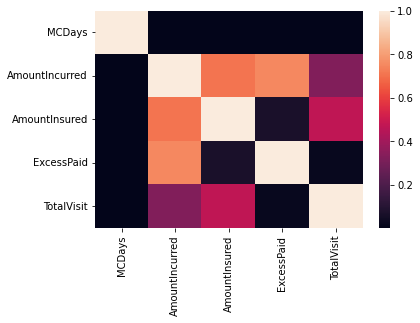

In [11]:
import seaborn as sns
sns.heatmap(df.corr())